<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/Week12_Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas

## Mendeteksi orientasi teks dan jenis skrip
Tugas ini bertujuan untuk mendeteksi orientasi teks dan jenis skrip yang digunakan dalam suatu gambar menggunakan tesseract.


**Tugas:**

1. Persiapan Gambar:

    - Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').

    - Tampilkan gambar asli menggunakan Python dan OpenCV.

2. Deteksi Orientasi dan Skrip:

    - Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.

    - Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).

    - Tampilkan hasil orientasi dan jenis skrip.

In [1]:
from zipfile import ZipFile

file_name = "/content/images-ocr.zip"  # Pastikan nama file persis sama

# 3. Tambahkan pengecekan error
try:
    with ZipFile(file_name, 'r') as zip_ref:
        zip_ref.extractall()
        print("Ekstraksi berhasil!")
except FileNotFoundError:
    print(f"File {file_name} tidak ditemukan. Mohon periksa nama dan lokasi file.")
except Exception as e:
    print(f"Terjadi error: {str(e)}")

Ekstraksi berhasil!


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (13.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [4]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

## Persiapan Gambar

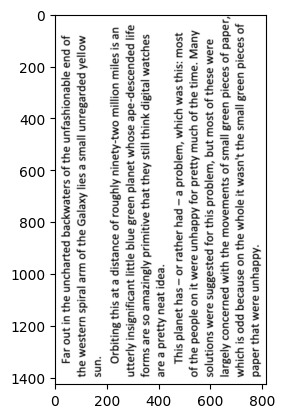

In [6]:
# Membaca gambar dari direktori
image = cv2.imread('/content/images/hitchhikers-rotated.png')
plt.imshow(image)

In [25]:
# Konversi ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplikan thresholding untuk mengurangi noise
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Dapatkan informasi orientasi dan skrip dari Tesseract
osd_info = pytesseract.image_to_osd(threshold, output_type=pytesseract.Output.DICT)

# Ekstrak informasi yang dibutuhkan
orientation = osd_info['rotate']

# Dapatkan jenis skrip
script_types = {
0: "English",
1: "Indonesian",
}

script = script_types.get(osd_info['script'], "English")

In [26]:
print("Hasil Analisis Teks:")
print(f"Orientasi Teks    : {orientation} derajat")
print(f"Jenis Skrip       : {script}")

Hasil Analisis Teks:
Orientasi Teks    : 90 derajat
Jenis Skrip       : English


In [11]:
import pytesseract
from PIL import Image
import cv2
import numpy as np

def detect_text_orientation_and_script(image_path):
    """
    Mendeteksi orientasi teks dan jenis skrip dari gambar menggunakan Tesseract.

    Args:
        image_path (str): Path ke file gambar

    Returns:
        tuple: (orientasi_derajat, jenis_skrip, confidence_score)
    """
    try:
        # Baca gambar
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Tidak dapat membaca gambar")

        # Konversi ke grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Aplikan thresholding untuk mengurangi noise
        _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Dapatkan informasi orientasi dan skrip dari Tesseract
        osd_info = pytesseract.image_to_osd(threshold, output_type=pytesseract.Output.DICT)

        # Ekstrak informasi yang dibutuhkan
        orientation = osd_info['rotate']
        script_confidence = osd_info['script_conf']

        # Dapatkan jenis skrip
        script_types = {
            0: "Latin",
            1: "Chinese",
            2: "Japanese",
            3: "Korean",
            4: "Arabic",
            5: "Devanagari",
            6: "Cyrillic"
        }

        script = script_types.get(osd_info['script'], "Unknown")

        return orientation, script, script_confidence

    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None, None

def process_and_display_results(image_path):
    """
    Memproses gambar dan menampilkan hasil deteksi.

    Args:
        image_path (str): Path ke file gambar
    """
    # Deteksi orientasi dan skrip
    orientation, script, confidence = detect_text_orientation_and_script(image_path)

    if orientation is not None:
        print("\nHasil Analisis Teks:")
        print("-" * 50)
        print(f"Orientasi Teks    : {orientation} derajat")
        print(f"Jenis Skrip      : {script}")
        print(f"Tingkat Keyakinan : {confidence:.2f}%")

        # Tampilkan gambar asli
        image = Image.open(image_path)
        image.show()
    else:
        print("Gagal memproses gambar")

# Contoh penggunaan
if __name__ == "__main__":
    # Ganti dengan path gambar Anda
    image_path = "/content/images/hitchhikers-rotated.png"
    process_and_display_results(image_path)


Hasil Analisis Teks:
--------------------------------------------------
Orientasi Teks    : 90 derajat
Jenis Skrip      : Unknown
Tingkat Keyakinan : 2.25%


In [28]:
import pytesseract
from PIL import Image
import cv2
import numpy as np

def analyze_text_orientation_script(image_path):
    """
    Menganalisis orientasi dan jenis script dari gambar teks yang dirotasi.

    Args:
        image_path (str): Path ke file gambar

    Returns:
        dict: Informasi tentang orientasi dan script
    """
    try:
        # Baca gambar
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError("Tidak dapat membaca gambar")

        # Konversi ke grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Thresholding untuk membersihkan noise
        _, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Dapatkan informasi orientasi dan script
        osd_info = pytesseract.image_to_osd(threshold, output_type=pytesseract.Output.DICT)

        # Analisis lebih detail untuk script
        text_details = pytesseract.image_to_data(threshold, output_type=pytesseract.Output.DICT)

        # Hitung confidence rata-rata untuk teks yang terdeteksi
        confidences = [conf for conf in text_details['conf'] if conf != -1]
        avg_confidence = sum(confidences) / len(confidences) if confidences else 0

        results = {
            'orientation_angle': osd_info['rotate'],
            'script_type': osd_info['script'],
            'script_confidence': osd_info['script_conf'],
            'text_confidence': avg_confidence,
            'detected_orientation': 'Vertical' if abs(osd_info['rotate']) in [90, 270] else 'Horizontal'
        }

        return results

    except Exception as e:
        print(f"Error dalam analisis: {str(e)}")
        return None

def display_analysis_results(results):
    """
    Menampilkan hasil analisis dalam format yang mudah dibaca.
    """
    if results:
        print("\nHasil Analisis Teks:")
        print("-" * 50)
        print(f"Sudut Rotasi        : {results['orientation_angle']}°")
        print(f"Orientasi Teks      : {results['detected_orientation']}")
        print(f"Jenis Script        : {results['script_type']}")
        print(f"Keyakinan Script    : {results['script_confidence']:.2f}%")
        print(f"Keyakinan Teks      : {results['text_confidence']:.2f}%")
    else:
        print("Gagal menganalisis gambar")

def rotate_and_save(image_path, angle):
    """
    Merotasi gambar dan menyimpan hasilnya.
    """
    try:
        image = Image.open(image_path)
        rotated = image.rotate(angle, expand=True)
        output_path = "rotated_text.jpg"
        rotated.save(output_path)
        print(f"\nGambar yang telah dirotasi disimpan sebagai: {output_path}")
        return output_path
    except Exception as e:
        print(f"Error dalam rotasi: {str(e)}")
        return None

# Analisis gambar
image_path = "/content/images/hitchhikers-rotated.png"  # Ganti dengan path gambar Anda
results = analyze_text_orientation_script(image_path)
display_analysis_results(results)

# Rotasi gambar jika diperlukan
if results and abs(results['orientation_angle']) > 0:
    rotated_path = rotate_and_save(image_path, results['orientation_angle'])
    if rotated_path:
        print("\nMenganalisis gambar yang telah dirotasi...")
        rotated_results = analyze_text_orientation_script(rotated_path)
        print("\nHasil analisis setelah rotasi:")
        display_analysis_results(rotated_results)


Hasil Analisis Teks:
--------------------------------------------------
Sudut Rotasi        : 90°
Orientasi Teks      : Vertical
Jenis Script        : Latin
Keyakinan Script    : 2.25%
Keyakinan Teks      : 46.99%
Error dalam rotasi: cannot write mode RGBA as JPEG
